1. Importing required modules to Notebook.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

2. Reading the CSV file and printing the first 5 and last 5 rows and columns.


In [3]:
#importing the CSV file
data = pd.read_csv('C:/Users/Suhas sattigeri/Desktop/Pro/archive/price_prediction.csv')
data

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,101,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,105,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,115,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
#Displaying the total Rows and Columns in the DataSet
data.shape

(205, 26)

In [6]:
#Displaying the first 5 data
data.head(5)


,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,101,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,105,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,115,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
#Displaying the last 5 data
data.tail(5)


,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


3. Displaying the datatype and non-null count of the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Inference: Total entries are 205, 0 to 204. Rows 205 and columns 26. As we can see on
17no. fulesystem has some null values and even in horsepower.

4. Display the description of all attributes in given dataset


In [11]:
#Descriptive statistics include those that summarize the central tendency,
#dispersion and shape of a dataset's distribution, excluding NaN values.
#Analyzes both numeric and object series, as well as DataFrame column sets o
#The output will vary depending on what is provided. 
data.describe().T #.T is used to swap the row and columns 


,count,mean,std,min,25%,50%,75%,max
ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


Inference: Total there are 205 entries; Mean of attribute named ID is found to be
103.000000.The minimum value in this column is around 1.00 and that of maximum is
205.00, STD of ID is about 59.322565. Mean of attribute named stroke is found to be
3.255415.The minimum value in this column is around 2.07 and that of maximum is 4.17,
STD of stroke is about 0.313597.


5.Displaying the null values of dataset

In [12]:
#Displays null values present in the dataset
data.isnull().sum()


ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

DataFrame.isnull is an alias for DataFrame.isna. Detect missing values. Return a boolean
same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN,
gets mapped to True values. Everything else gets mapped to False values. Characters such
as empty strings '' or numpy.inf are not considered NA values (unless you set
pandas.options.mode.use_inf_as_na = True).

In [13]:
#removes the null valuues from the dataset
data["horsepower"].fillna("No horsepower ", inplace = True)
data.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

5. Returns the unique values

In [14]:
len(data['name'].unique())


147

6. Count number of distinct elements in specified axis. Return Series with number of
distinct elements. Can ignore NaN values.


In [15]:
#Displays the unique values in the dataset
data.nunique()


ID                  205
symboling             6
name                147
fueltypes             2
aspiration            2
doornumbers           2
carbody               5
drivewheels           3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

7. Displaying all the columns name of dataset

In [17]:
data.columns


Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

Exploratory Data Analysis


8. Adding the new colume to the dataset

In [18]:
# Adding a new column with derived data
data['EMI'] = data['price']/100
# Changed data
print (data.head(2))


   ID  symboling                 name fueltypes aspiration doornumbers  \
0   1          3   alfa-romero giulia       gas        std         two   
1   2          3  alfa-romero stelvio       gas        std         two   

       carbody drivewheels enginelocation  wheelbase  ...  fuelsystem  \
0  convertible         rwd          front       88.6  ...        mpfi   
1  convertible         rwd          front       88.6  ...        mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \
0       3.47    2.68               9.0        111    5000       21         27   
1       3.47    2.68               9.0        101    5000       21         27   

     price     EMI  
0  13495.0  134.95  
1  16500.0  165.00  

[2 rows x 27 columns]


we can see know new column is added to data set as "EMI"

9. Changing the columns name

In [19]:
#Rename column heading as it has '.' in it which will create problems when 
data.rename(columns ={'ID': 'id'}, inplace = True)
data.rename(columns ={'name': 'NAME'}, inplace = True)
# Lets check the column headings
list(data)

['id',
 'symboling',
 'NAME',
 'fueltypes',
 'aspiration',
 'doornumbers',
 'carbody',
 'drivewheels',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'EMI']

Inference: Specified attributes are converted to lowercase and uppercase.
    
    
10. Displaying the histplot chat of price and count


<AxesSubplot:xlabel='price', ylabel='Count'>

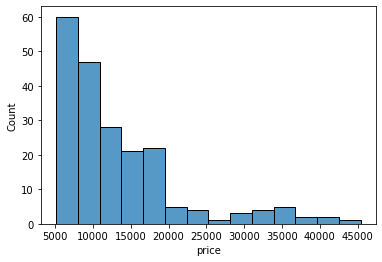

In [20]:
sns.histplot(x='price', data=data )


Inference: Most of the cars price is in between 5000 to 10000. In 205 cars ,110 cars price is
bellow 10000.


11. Displaying the most used things in cars

<AxesSubplot:>

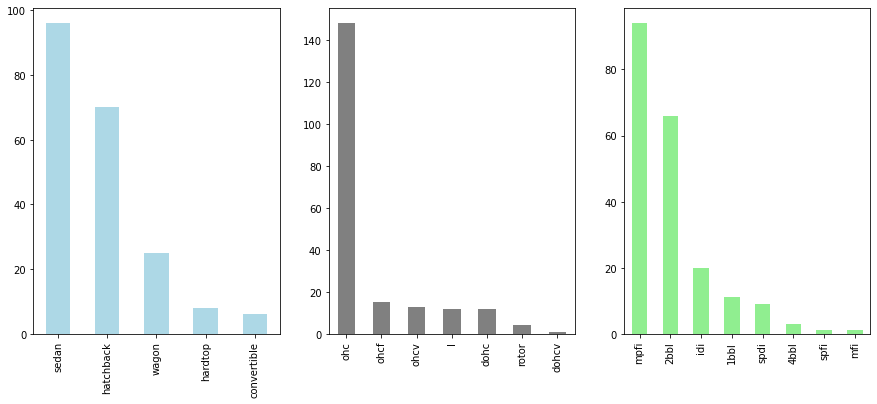

In [56]:
# Set the figure size for the plots
plt.figure(figsize=(15,6))
# Create the first subplot for 'carbody' feature
plt.subplot(1,3,1)
data.carbody.value_counts().plot(kind='bar', color='lightblue')
# Create the second subplot for 'enginetype' feature
plt.subplot(1,3,2)
data.enginetype.value_counts().plot(kind='bar', color='gray')
# Create the third subplot for 'fuelsystem' feature
plt.subplot(1,3,3)
data.fuelsystem.value_counts().plot(kind='bar', color='lightgreen')


Inference: Most of the carbody used in cars is "sedam", and least is "conbertible". most of
the enginetype used in cars "ohc", and least is "dohcv". most of the fuelsystem used in cars
is "mpfi" and least is "spfi".

12. Displaying the graph to now how much compnay manufactured enginesize and
horsepower

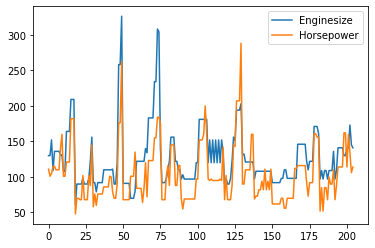

In [57]:
def plot_some_lines():
    # Create a new figure for the plots
    plt.figure()
    # Get the values for 'enginesize' and 'horsepower'
    y1 = data.enginesize.values
    y2 = data.horsepower.values
    # Plot 'enginesize' and 'horsepower' on the same graph
    plt.plot(y1, label="Enginesize")
    plt.plot(y2, label="Horsepower")
    # Add a legend to distinguish the lines
    plt.legend()
    # Display the plot
    plt.show()

# Call the function to create the plot
plot_some_lines()


Inference: As we see in the graph most of the cars enginesize and horsepower is around 50
to 150.



13. Displaying the bar graph

<AxesSubplot:xlabel='fueltypes', ylabel='count'>

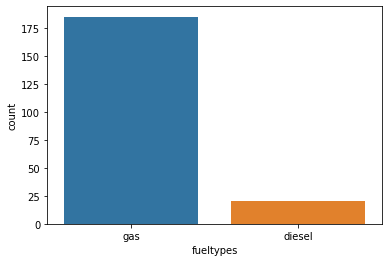

In [59]:
# Display a count plot for the 'fueltypes' feature
sns.countplot(x='fueltypes', data=data)


Inference: Almost of the cars uses gas as a fule type.
    
    
    
14. Displaying the bar chat on drivewheels

<AxesSubplot:xlabel='drivewheels', ylabel='count'>

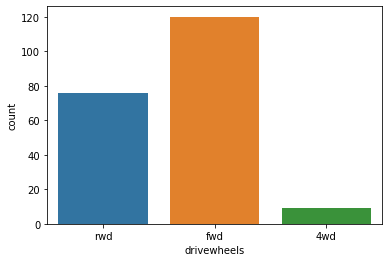

In [25]:
#Displaying the graph on which drivewheels 
sns.countplot(x='drivewheels', data=data)


Inference: fwd(frontwheeldrive) cars are more the rwd(rearwheeldrive) or 4wd(4wheeldrive)


15. Displaying the bar chat on number of doors

<AxesSubplot:xlabel='doornumbers', ylabel='count'>

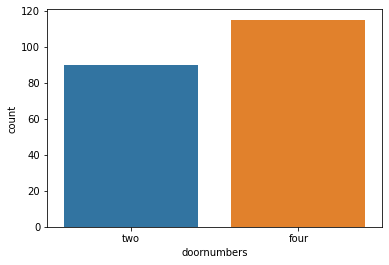

In [26]:
#displaying how many doors are there to the cars
sns.countplot(x='doornumbers', data=data)


Inference: Most of the cars have 4 doors

In [27]:
#droping the id from dataset
data2=data.drop('id',axis=1)
data2

,symboling,NAME,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,EMI
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,134.95
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,101,5000,21,27,16500.0,165.00
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,105,5000,19,26,16500.0,165.00
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,115,5500,24,30,13950.0,139.50
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,174.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,168.45
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,190.45
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,214.85
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,224.70


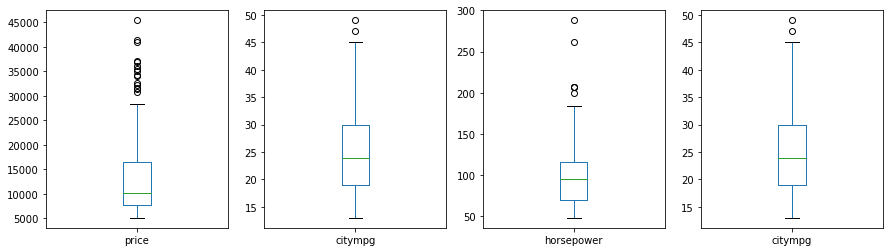

In [60]:
# Set the figure size for the plots
plt.figure(figsize=(15,4))
# Create the first subplot for 'price'
plt.subplot(1,4,1)
data.price.plot(kind='box')
# Create the second subplot for 'citympg'
plt.subplot(1,4,2)
data.citympg.plot(kind='box')
# Create the third subplot for 'horsepower'
plt.subplot(1,4,3)
data.horsepower.plot(kind='box')
# Create the fourth subplot for 'citympg' (appears twice in the original code)
plt.subplot(1,4,4)
data.citympg.plot(kind='box')
# Display the plots
plt.show()


In [34]:
# Calculate the 25th percentile (Q1) and 75th percentile (Q3) of the dataset
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Align the DataFrame with the quantiles
data_aligned, Q1_aligned = data.align(Q1, axis=1, copy=False)
_, Q3_aligned = data.align(Q3, axis=1, copy=False)

# Filter out the outliers based on the IQR method after alignment
data2 = data_aligned[~((data_aligned < (Q1_aligned - 1.5 * IQR)) | 
                       (data_aligned > (Q3_aligned + 1.5 * IQR))).any(axis=1)]

# Display the cleaned dataset without outliers
data2


,EMI,NAME,aspiration,boreratio,carbody,carheight,carlength,carwidth,citympg,compressionratio,...,fuelsystem,fueltypes,highwaympg,horsepower,id,peakrpm,price,stroke,symboling,wheelbase
0,134.95,alfa-romero giulia,std,3.47,convertible,48.8,168.8,64.1,21,9.0,...,mpfi,gas,27,111,1,5000,13495.0,2.68,3,88.6
1,165.00,alfa-romero stelvio,std,3.47,convertible,48.8,168.8,64.1,21,9.0,...,mpfi,gas,27,101,2,5000,16500.0,2.68,3,88.6
2,165.00,alfa-romero Quadrifoglio,std,2.68,hatchback,52.4,171.2,65.5,19,9.0,...,mpfi,gas,26,105,3,5000,16500.0,3.47,1,94.5
3,139.50,audi 100 ls,std,3.19,sedan,54.3,176.6,66.2,24,10.0,...,mpfi,gas,30,115,4,5500,13950.0,3.40,2,99.8
4,174.50,audi 100ls,std,3.19,sedan,54.3,176.6,66.4,18,8.0,...,mpfi,gas,22,115,5,5500,17450.0,3.40,2,99.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,189.50,volvo diesel,turbo,3.62,wagon,57.5,188.8,67.2,17,7.5,...,mpfi,gas,22,162,200,5100,18950.0,3.15,-1,104.3
200,168.45,volvo 145e (sw),std,3.78,sedan,55.5,188.8,68.9,23,9.5,...,mpfi,gas,28,114,201,5400,16845.0,3.15,-1,109.1
201,190.45,volvo 144ea,turbo,3.78,sedan,55.5,188.8,68.8,19,8.7,...,mpfi,gas,25,160,202,5300,19045.0,3.15,-1,109.1
202,214.85,volvo 244dl,std,3.58,sedan,55.5,188.8,68.9,18,8.8,...,mpfi,gas,23,134,203,5500,21485.0,2.87,-1,109.1


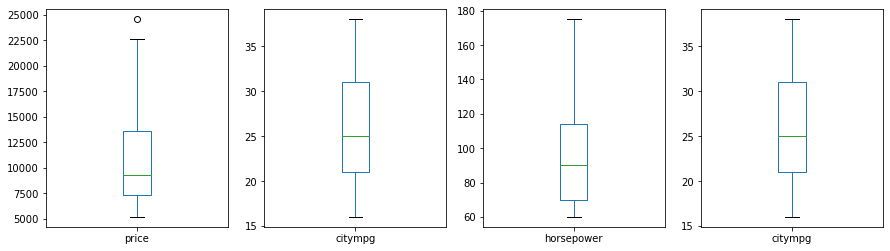

In [61]:
# Set the figure size for the plots
plt.figure(figsize=(15,4))
# Create the first subplot for 'price' showing outliers
plt.subplot(1,4,1)
data2.price.plot(kind='box')
# Create the second subplot for 'citympg' showing outliers
plt.subplot(1,4,2)
data2.citympg.plot(kind='box')
# Create the third subplot for 'horsepower' showing outliers
plt.subplot(1,4,3)
data2.horsepower.plot(kind='box')
# Create the fourth subplot for 'citympg' showing outliers (appears twice)
plt.subplot(1,4,4)
data2.citympg.plot(kind='box')
# Display the plots
plt.show()


In [62]:
# Calculate and display the correlation matrix for the 'data2' DataFrame
data2.corr()


,EMI,boreratio,carheight,carlength,carwidth,citympg,compressionratio,curbweight,enginesize,highwaympg,horsepower,id,peakrpm,price,stroke,symboling,wheelbase
EMI,1.000000,0.679488,0.188359,0.716798,0.730877,-0.784882,-0.119159,0.827155,0.721929,-0.779469,0.805338,0.165101,-0.071763,1.000000,-0.182817,-0.062363,0.619377
boreratio,0.679488,1.000000,0.271055,0.768027,0.725320,-0.639859,-0.096708,0.734303,0.624519,-0.626173,0.655903,0.422825,-0.215439,0.679488,-0.144325,-0.128064,0.645720
carheight,0.188359,0.271055,1.000000,0.498097,0.270002,-0.145860,-0.083327,0.353165,0.193093,-0.185372,0.069386,0.345462,-0.255911,0.188359,-0.065950,-0.537559,0.586796
carlength,0.716798,0.768027,0.498097,1.000000,0.802521,-0.723117,-0.165483,0.868877,0.704487,-0.725348,0.679666,0.439919,-0.256648,0.716798,-0.008049,-0.290504,0.830703
carwidth,0.730877,0.725320,0.270002,0.802521,1.000000,-0.699382,-0.139796,0.805567,0.683059,-0.707852,0.729272,0.402597,-0.100638,0.730877,0.064580,-0.166109,0.780475
citympg,-0.784882,-0.639859,-0.145860,-0.723117,-0.699382,1.000000,0.370886,-0.832581,-0.646633,0.980414,-0.820379,-0.171618,-0.013829,-0.784882,-0.052103,-0.057073,-0.543541
compressionratio,-0.119159,-0.096708,-0.083327,-0.165483,-0.139796,0.370886,1.000000,-0.203319,-0.129500,0.351069,-0.255255,0.012877,0.152268,-0.119159,-0.186029,0.185541,-0.180025
curbweight,0.827155,0.734303,0.353165,0.868877,0.805567,-0.832581,-0.203319,1.000000,0.823122,-0.847877,0.824666,0.371233,-0.190080,0.827155,-0.032043,-0.199621,0.739128
enginesize,0.721929,0.624519,0.193093,0.704487,0.683059,-0.646633,-0.129500,0.823122,1.000000,-0.654606,0.785364,0.290264,-0.328112,0.721929,0.108284,-0.159527,0.580014
highwaympg,-0.779469,-0.626173,-0.185372,-0.725348,-0.707852,0.980414,0.351069,-0.847877,-0.654606,1.000000,-0.819358,-0.182466,-0.025010,-0.779469,-0.055931,-0.007403,-0.578421


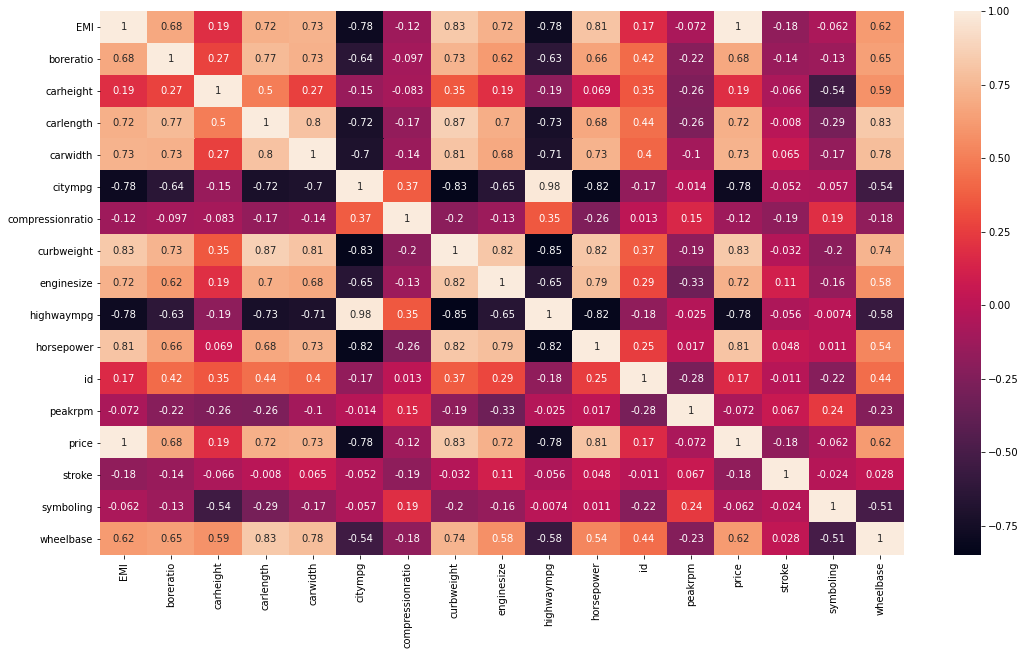

In [63]:
# Set the figure size for the heatmap
plt.figure(figsize=(18,10))
# Create a heatmap of the correlation matrix with annotations
sns.heatmap(data2.corr(), annot=True)
# Display the heatmap
plt.show()


In [40]:
# Drop the specified columns from data2
data_multi = data2.drop(['carheight', 'compressionratio', 'boreratio', 'stroke', 
                         'symboling', 'peakrpm'], axis=1)

# Display the modified DataFrame after dropping the columns
data_multi


,EMI,NAME,aspiration,carbody,carlength,carwidth,citympg,curbweight,cylindernumber,doornumbers,...,enginelocation,enginesize,enginetype,fuelsystem,fueltypes,highwaympg,horsepower,id,price,wheelbase
0,134.95,alfa-romero giulia,std,convertible,168.8,64.1,21,2548,four,two,...,front,130,dohc,mpfi,gas,27,111,1,13495.0,88.6
1,165.00,alfa-romero stelvio,std,convertible,168.8,64.1,21,2548,four,two,...,front,130,dohc,mpfi,gas,27,101,2,16500.0,88.6
2,165.00,alfa-romero Quadrifoglio,std,hatchback,171.2,65.5,19,2823,six,two,...,front,152,ohcv,mpfi,gas,26,105,3,16500.0,94.5
3,139.50,audi 100 ls,std,sedan,176.6,66.2,24,2337,four,four,...,front,109,ohc,mpfi,gas,30,115,4,13950.0,99.8
4,174.50,audi 100ls,std,sedan,176.6,66.4,18,2824,five,four,...,front,136,ohc,mpfi,gas,22,115,5,17450.0,99.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,189.50,volvo diesel,turbo,wagon,188.8,67.2,17,3157,four,four,...,front,130,ohc,mpfi,gas,22,162,200,18950.0,104.3
200,168.45,volvo 145e (sw),std,sedan,188.8,68.9,23,2952,four,four,...,front,141,ohc,mpfi,gas,28,114,201,16845.0,109.1
201,190.45,volvo 144ea,turbo,sedan,188.8,68.8,19,3049,four,four,...,front,141,ohc,mpfi,gas,25,160,202,19045.0,109.1
202,214.85,volvo 244dl,std,sedan,188.8,68.9,18,3012,six,four,...,front,173,ohcv,mpfi,gas,23,134,203,21485.0,109.1


In [64]:
# Convert categorical variables to dummy/indicator variables, dropping the first category to avoid multicollinearity
data_dummies = pd.get_dummies(data_multi, drop_first=True)
# Display the DataFrame with dummy variables
data_dummies


,EMI,carlength,carwidth,citympg,curbweight,enginesize,highwaympg,horsepower,id,price,...,drivewheels_rwd,enginetype_l,enginetype_ohc,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,134.95,168.8,64.1,21,2548,130,27,111,1,13495.0,...,1,0,0,0,0,0,0,1,0,0
1,165.00,168.8,64.1,21,2548,130,27,101,2,16500.0,...,1,0,0,0,0,0,0,1,0,0
2,165.00,171.2,65.5,19,2823,152,26,105,3,16500.0,...,1,0,0,1,0,0,0,1,0,0
3,139.50,176.6,66.2,24,2337,109,30,115,4,13950.0,...,0,0,1,0,0,0,0,1,0,0
4,174.50,176.6,66.4,18,2824,136,22,115,5,17450.0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,189.50,188.8,67.2,17,3157,130,22,162,200,18950.0,...,1,0,1,0,0,0,0,1,0,0
200,168.45,188.8,68.9,23,2952,141,28,114,201,16845.0,...,1,0,1,0,0,0,0,1,0,0
201,190.45,188.8,68.8,19,3049,141,25,160,202,19045.0,...,1,0,1,0,0,0,0,1,0,0
202,214.85,188.8,68.9,18,3012,173,23,134,203,21485.0,...,1,0,0,1,0,0,0,1,0,0


In [65]:
# Define the target variable 'y' as the 'price' column
y = data_dummies['price']
# Define the feature set 'x1' by dropping the 'price' column
x1 = data_dummies.drop(['price'], axis=1)
# Add a constant column to the feature set for the intercept term in regression
x = sm.add_constant(pd.DataFrame(x1))



In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
inputs_scaled = scaler.transform(x)
inputs_scaled


array([[ 0.        ,  0.57373043, -0.25233868, ...,  1.09833929,
        -0.19316685, -0.08512565],
       [ 0.        ,  1.24392175, -0.25233868, ...,  1.09833929,
        -0.19316685, -0.08512565],
       [ 0.        ,  1.24392175, -0.02713755, ...,  1.09833929,
        -0.19316685, -0.08512565],
       ...,
       [ 0.        ,  1.81152139,  1.62433744, ...,  1.09833929,
        -0.19316685, -0.08512565],
       [ 0.        ,  2.35570336,  1.62433744, ...,  1.09833929,
        -0.19316685, -0.08512565],
       [ 0.        ,  2.60995231,  1.62433744, ...,  1.09833929,
        -0.19316685, -0.08512565]])

In [46]:
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and a random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, y, test_size=0.2, random_state=42)

In [47]:
# Fit the model, according to the OLS (ordinary least squares) method with a
results = sm.OLS(y_train,x_train).fit()
# Print a nice summary of the regression.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.503e+25
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.01e-51
Time:                        11:06:29   Log-Likelihood:                 2369.0
No. Observations:                 111   AIC:                            -4524.
Df Residuals:                       4   BIC:                            -4234.
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.331e-10    2.9e-22   4.59e+11      0.000    1.33e-10    1.33e-10
x1          4483.7943   3.11e-09   1.44e+12      0.000    4483.794    4483.794
x2         -2.055e-10   2.64e-09     -0.078      0.942   -7.54e-09    7.12e-09
x3         -5.684e-10      3e-09     -0.190      0.859   -8.89e-09    7.75e-09
x4          4.229e-11   1.77e-09      0.024      0.982   -4.87e-09    4.95e-09
x5         -2.183e-11   4.69e-09     -0.005      0.997    -1.3e-08     1.3e-08
x6          9.059e-10   4.28e-09      0.211      0.843    -1.1e-08    1.28e-08
x7          -1.03e-10   1.58e-09     -0.065      0.951   -4.49e-09    4.29e-09
x8         -1.928e-10   2.63e-09     -0.073      0.945   -7.48e-09     7.1e-09
x9          4.358e-09   1.96e-08      0.222      0.835      -5e-08    5.87e-08
x10        -5.639e-11   1.45e-09     -0.039      0.971    -4.1e-09    3.98e-09
x11         6.403e-10    2.8e-09      0.229      0.830   -7.13e-09    8.41e-09
x12           88.9961    2.7e-09    3.3e+10      0.000      88.996      88.996
x13           88.9961   2.79e-09   3.18e+10      0.000      88.996      88.996
x14         7.149e-10   3.29e-09      0.217      0.839   -8.43e-09    9.86e-09
x15        -7841.9768   2.27e-10  -3.45e+13      0.000   -7841.977   -7841.977
x16          427.2918   2.77e-09   1.54e+11      0.000     427.292     427.292
x17          9.95e-10   4.49e-09      0.222      0.835   -1.15e-08    1.35e-08
x18          522.8439   2.54e-09   2.06e+11      0.000     522.844     522.844
x19          522.8439   2.51e-09   2.08e+11      0.000     522.844     522.844
x20          522.8439   2.98e-09   1.75e+11      0.000     522.844     522.844
x21        -7841.9768   2.27e-10  -3.45e+13      0.000   -7841.977   -7841.977
x22        -7841.9768   2.27e-10  -3.45e+13      0.000   -7841.977   -7841.977
x23         4.111e-10   1.86e-09      0.221      0.836   -4.76e-09    5.59e-09
x24         3.902e-10   1.77e-09      0.220      0.836   -4.52e-09     5.3e-09
x25         4.047e-10   1.75e-09      0.232      0.828   -4.45e-09    5.26e-09
x26        -7841.9768   2.27e-10  -3.45e+13      0.000   -7841.977   -7841.977
x27         3.924e-10   1.75e-09      0.224      0.834   -4.47e-09    5.25e-09
x28         3.283e-10   1.55e-09      0.212      0.842   -3.97e-09    4.63e-09
x29         4.197e-10   1.79e-09      0.234      0.826   -4.55e-09    5.39e-09
x30         3.993e-10   1.84e-09      0.217      0.839    -4.7e-09     5.5e-09
x31          126.3079   1.83e-09   6.91e+10      0.000     126.308     126.308
x32           89.6386   1.39e-09   6.43e+10      0.000      89.639      89.639
x33           89.6386   1.48e-09   6.04e+10      0.000      89.639      89.639
x34          126.3079   2.08e-09   6.06e+10      0.000     126.308     126.308
x35         3.702e-10   1.74e-09      0.213      0.842   -4.45e-09    5.19e-09
x3

Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly
specified. [2] The smallest eigenvalue is 2.1e-30. This might indicate that there are strong
multicollinearity problems or that the design matrix is singular.
**p-vale of the columns 2,3,5,6,15,16,40 seems to be higher than the significance value of
0.05, hence dropping it as it is insignificant in presence of other variables.

In [66]:
# Select specific columns from 'x' based on indices and store their names in 'new_x'
new_x = []
for i in [2, 3, 5, 6, 15, 16, 40]:
    new_x.append(list(x.columns)[i])
# Create a new DataFrame 'new_data' with only the selected columns
new_data = x[new_x]


In [67]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object to standardize features
scaler = StandardScaler()
# Fit the scaler to the data and compute the mean and standard deviation
scaler.fit(new_data)
# Transform the data by scaling it to have zero mean and unit variance
inputs_scaled = scaler.transform(new_data)


In [54]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets, using 20% of the data for testing
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, y, test_size=0.2, random_state=42)



In [68]:
# Fit an Ordinary Least Squares (OLS) regression model using the training data
results = sm.OLS(y_train, x_train).fit()
# Display the summary of the regression results
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     37.93
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           4.49e-24
Time:                        11:13:44   Log-Likelihood:                -1026.9
No. Observations:                 111   AIC:                             2068.
Df Residuals:                     104   BIC:                             2087.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -196.7446    520.589     -0.378      0.706   -1229.092     835.603
x2           973.3048    421.681      2.308      0.023     137.095    1809.515
x3          2954.1270    642.869      4.595      0.000    1679.293    4228.961
x4           336.0669    449.575      0.748      0.456    -555.458    1227.592
x5          -1.29e+05   2919.349    -44.204      0.000   -1.35e+05   -1.23e+05
x6           237.0556    222.869      1.064      0.290    -204.902     679.013
x7           364.3209    314.582      1.158      0.249    -259.507     988.149
==============================================================================
Omnibus:                       20.837   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.879
Skew:                           0.961   Prob(JB):                     8.84e-07
Kurtosis:                       4.529   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""